When there are millions of features for training instance, it makes harder to find optimal solution and the training process will be very slow and this is referred as the curse of dimensionality.

In real-world problems, we can reduce number of features considerably but reducing dimensionality does lose some information making the model a bit worse. It also makes the pipelines a bit more complex and thus harder to maintain. 

High dimensional datasets are at risk of being very sparse, which means a new instance will likely be far away from any training instances, making predictions much less reliable than in lower dimensions. 

The more dimensions the training set has, the greater the risk of overfitting it.


#### Projection

We can project the training instances into a much lower-dimensional subspace of the high-dimensional space.

However, projection is not always the best approach to dimensionality reduction. In many cases the subspace may twist and turn, such as in the famous Swiss roll toy dataset. 


#### Manifold Learning
It is based on the idea that high-dimensional data often lie on or near a lower-dimensional manifold within the higher-dimensional space.


### PCA

PCA stands for Principal Component Analysis that identifies the hyperplane that lies closest to the data and then it projects the data onto it.

Steps:
1. Standardize the data.

2. Compute the covariance matrix. (Diagonal of covariance matrix consists variances and remaining elements consists of covariance. It is square matrix which provides a measure of the degree to which to random variables or features in a dataset vary together.)

3. Compute the Eigenvalues and Eigenvectors of the covariance matrix.

4. Select the top k Eigenvectors that corresponds largest eigenvalues. (Eigenvalues explains about variance)

5. Transform the data onto the subspaces created by the top k eigenvectors by dot multplication of transpose of principle component and standardize data.

In [47]:
import numpy as np

np.random.seed(42)
m=60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m)*3*np.pi/2-0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m)/2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [49]:
X2D

array([[-0.690074  , -0.36150744],
       [ 1.39636097,  0.34497714],
       [ 1.00728461, -0.35025708],
       [ 0.2736333 , -0.50516373],
       [-0.91324535,  0.26290852],
       [-0.79710027,  0.26718188],
       [-0.55173939,  0.65062721],
       [ 1.41612959,  0.16567641],
       [ 0.40776059, -0.46053322],
       [ 0.85209856, -0.40516935],
       [-0.46269946,  0.61952736],
       [ 1.2826692 ,  0.41018903],
       [ 1.37468032,  0.03618608],
       [-0.96941594,  0.10932241],
       [-0.97219266,  0.14390464],
       [-1.05216924,  0.07740862],
       [-0.92770444, -0.22364286],
       [-0.01473543, -0.4153169 ],
       [-0.47010859, -0.46920058],
       [-0.87761843, -0.08515546],
       [ 0.38973612, -0.45189716],
       [-0.96989867,  0.19819051],
       [-0.93689997, -0.09307933],
       [-0.81304146, -0.26096051],
       [-0.41368569, -0.42009096],
       [ 1.2830484 , -0.02603822],
       [-0.95210787,  0.23163682],
       [-0.2005476 , -0.49130242],
       [ 0.33988682,

In [50]:
X3D_inv = pca.inverse_transform(X2D)

In [51]:
np.allclose(X3D_inv, X)

False

In [52]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.009421417196957216

In [53]:
pca.components_

array([[-0.95250178, -0.24902446, -0.17529172],
       [ 0.29267159, -0.9076305 , -0.30091563]])

In [54]:
pca.components_.T[0]

array([-0.95250178,  0.29267159])

In [55]:
pca.explained_variance_ratio_ # it indicatest the proportion of the dataset's variance that lies along the axis of each principle component

array([0.85406025, 0.13622918])

In [56]:
np.sum(pca.explained_variance_ratio_)

0.9902894323839865

In [57]:
(1 - np.sum(pca.explained_variance_ratio_)) * 100

0.9710567616013521

In [58]:
# Third axis only carries 0.97% of the variance, meaning it containes very little information

In [59]:
pca = PCA(n_components=None) # Default is also None, so we can leave it also.
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_) # cumulutive sum

In [60]:
cumsum

array([0.85406025, 0.99028943, 1.        ])

In [61]:
np.argmax(cumsum >= 0.95) + 1 # adding 1 for countering indexing

2

In [62]:
# More easy way is to set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

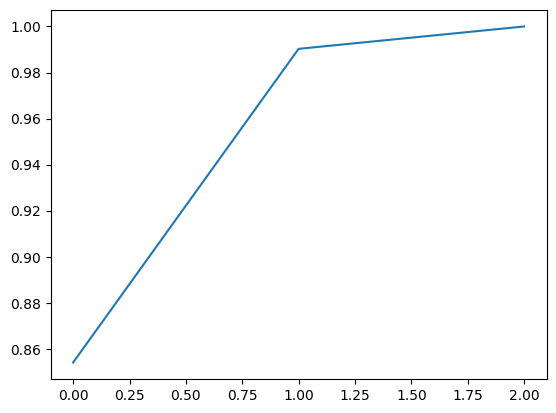

In [63]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(cumsum)

#### MNIST Dataset compression

In [64]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [65]:
pca = PCA(n_components=0.95)
X_mnist_reduced = pca.fit_transform(mnist["data"])

In [66]:
pca.n_components_

154

In [67]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [68]:
X_recovered = pca.inverse_transform(X_mnist_reduced)

Text(0.5, 1.0, 'Compressed')

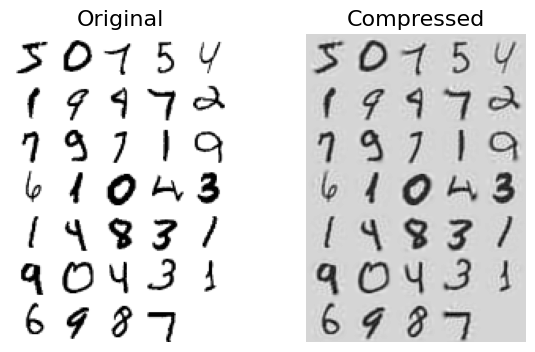

In [69]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(mnist.data[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

#### Incremental PCA

One problem with the preceding implementation of PCA is it requires the whole training set to fit in memory. 

We can use Incremental PCA(IPCA) algorithms that split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time. 

In [70]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(mnist.data, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_mnist_reduced = inc_pca.transform(mnist.data)

In [72]:
X_mm = np.memmap("my_mnist.data", dtype='float32', mode='write', shape=mnist["data"].shape)

In [73]:
#  Deleting the memmap() object will trigger its Python finalizer, which ensures that the data is saved to disk.
del X_mm

In [74]:
X_mm = np.memmap("my_mnist.data", dtype='float32', mode='readonly', shape=mnist["data"].shape)

m, n = mnist["data"].shape

batch_size = m//n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

D:\ML\lib\site-packages\sklearn\decomposition\_incremental_pca.py:338: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio = S ** 2 / np.sum(col_var * n_total_samples)


IncrementalPCA(batch_size=700, n_components=154)